In [30]:
import os 
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [31]:
images = []
labels = []

img_height, img_width = 96,96
classes = ["up", "down", "left", "right", "nothing"]

num_of_images = [0,0,0,0,0]


min_images = 250


for i in range(len(classes)):
    a_class = classes[i]
    folder_path = os.path.join('images',a_class) # grab each folder
    print(folder_path)
    counter = 0
    for image in os.listdir(folder_path):
        if counter == min_images:
            print("Reached enough images")
            break
        img_path = os.path.join(folder_path,image) # grab each image
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0
            
            images.append(img)
            labels.append(a_class)
            counter += 1
        
    print(f"Number of images {counter}")
    num_of_images[i] = counter
    print(num_of_images)

    
print(f"Total images loaded: {len(images)}")
print(f"Images per class: {num_of_images}")

dict_no_of_images = dict(zip(classes, num_of_images))

images\up
Number of images 249
[249, 0, 0, 0, 0]
images\down
Number of images 196
[249, 196, 0, 0, 0]
images\left
Reached enough images
Number of images 250
[249, 196, 250, 0, 0]
images\right
Reached enough images
Number of images 250
[249, 196, 250, 250, 0]
images\nothing
Reached enough images
Number of images 250
[249, 196, 250, 250, 250]
Total images loaded: 1195
Images per class: [249, 196, 250, 250, 250]


In [32]:
X = np.array(images)
y = np.array(labels)

# one hot encode the labels
classes_to_index = {cls:idx for idx,cls in enumerate(classes)} # index: label for enum

# fill up with 0 for each example
y_onehot = np.zeros((len(y), len(classes))) #number of examples, number of classes
for i, label in enumerate(y):
    y_onehot[i, classes_to_index[label]] = 1 # first dimension: rows, second: column

print(y_onehot.shape)
print(y_onehot[:-5])

(1195, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [33]:
# split the train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify= y)


print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (956, 96, 96, 3), (956, 5)
Test set: (239, 96, 96, 3), (239, 5)


In [34]:
from tensorflow import keras
from keras import layers

# fml i think its overfitting so badly time to play more subway surfers 

model = keras.Sequential()

# convolution layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, 3)))
# pooling layer
model.add(layers.MaxPool2D(pool_size=(2,2)))

# another one to learn more complex features
model.add(layers.Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())

## trad nn
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3)) # trying to reduce overfitting
model.add(layers.Dense(5, activation="linear"))  # 5 classes

# categorical crossentropy 
# from_logits already applied softmax internally 
model.compile(
	loss=keras.losses.CategoricalCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['accuracy']
)

# fit the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

c:\Personal\Tech_Projects\AI_projects\subway_surfers\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.2270 - loss: 1.6102 - val_accuracy: 0.2552 - val_loss: 1.5612
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3849 - loss: 1.4226 - val_accuracy: 0.5900 - val_loss: 1.1847
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6088 - loss: 1.0033 - val_accuracy: 0.6151 - val_loss: 0.9417
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6789 - loss: 0.7976 - val_accuracy: 0.6444 - val_loss: 0.8526
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7322 - loss: 0.6804 - val_accuracy: 0.7406 - val_loss: 0.6979
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7887 - loss: 0.5607 - val_accuracy: 0.7824 - val_loss: 0.6058
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8379 - loss: 0.4336 - val_accuracy: 0.7615 - val_loss: 0.6204
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8441 - loss: 0.4324 - val_accuracy: 0.7950 - 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Number of wrong predictions: 41 out of 239


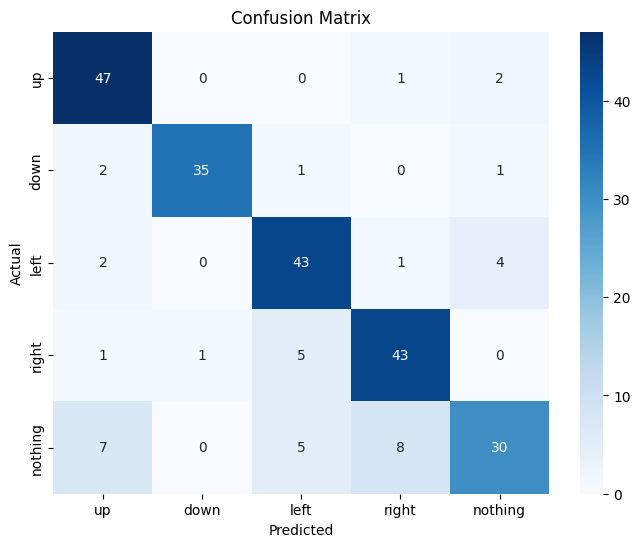


Classification Report:
              precision    recall  f1-score   support

          up       0.80      0.94      0.86        50
        down       0.97      0.90      0.93        39
        left       0.80      0.86      0.83        50
       right       0.81      0.86      0.83        50
     nothing       0.81      0.60      0.69        50

    accuracy                           0.83       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.83      0.83      0.82       239



In [35]:
import matplotlib.pyplot as plt

# check whihch one wrong
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true_classes = np.argmax(y_test, axis=1) 

# incorrectly predicted 
wrong_indices = np.where(y_pred_classes != y_true_classes)[0]
print(f"Number of wrong predictions: {len(wrong_indices)} out of {len(y_test)}")


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#  confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, 
                          target_names=classes))



In [36]:
## save the model
model.save("model/model_9.keras")